### Group Member ### 
Jen Wang

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Education-Income
chip = pd.read_csv("education-income.csv")
chip.head(10)

,Neighborhood,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
0,Allegheny Center,3,933,609,18.70%,44.50%,17.20%,15.80%,3.80%,"$16,964","$20,911","$22,535","$22,793",954,324,34.00%
1,Allegheny West,3,462,239,9.20%,28.90%,6.70%,44.80%,10.50%,"$26,638","$41,761","$35,386","$45,519",239,12,5.00%
2,Allentown,6,"2,500","1,729",23.00%,63.30%,6.60%,5.60%,1.50%,"$22,539","$29,274","$29,941","$31,909","2,212",630,28.50%
3,Arlington,7,"1,869","1,232",14.90%,65.30%,10.10%,7.10%,2.50%,"$27,167","$25,119","$36,089","$27,380","1,779",361,20.30%
4,Arlington Heights,7,244,166,18.10%,74.10%,0.00%,7.80%,0.00%,"$18,646","$9,417","$24,769","$10,265",293,169,57.70%
5,Banksville,5,"4,144","3,935",9.80%,51.50%,9.80%,22.30%,6.60%,"$38,555","$50,625","$51,217","$55,181","4,170",243,5.80%
6,Bedford Dwellings,15,"1,202",733,8.30%,49.90%,12.80%,14.20%,14.70%,"$8,955","$9,992","$11,896","$10,891","1,203",589,49.00%
7,Beechview,5,"7,974","5,211",11.00%,58.10%,11.10%,13.60%,6.20%,"$34,079","$36,602","$45,270","$39,896","7,450","1,366",18.30%
8,Beltzhoover,6,"1,925","1,369",19.30%,54.30%,13.80%,8.30%,4.20%,"$26,750","$33,869","$35,535","$36,917","2,066",485,23.50%
9,Bloomfield,12,"8,442","6,671",11.20%,42.60%,8.60%,24.10%,13.50%,"$23,831","$30,830","$31,658","$33,604","9,192","1,781",19.40%


In [7]:
# Rename columns by removing problematic characters such as "'","%","$",","
chip.columns = chip.columns.str.replace("'"," ")
chip['Edu. Attainment: Bachelor s Degree (2010)'] = chip['Edu. Attainment: Bachelor s Degree (2010)'].str.replace('%', '')
chip["Edu. Attainment: Postgraduate Degree (2010)"] = chip['Edu. Attainment: Postgraduate Degree (2010)'].str.replace('%', '')
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace('$','')
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace(',','')
chip['Est. Percent Under Poverty (2010)'] = chip['Est. Percent Under Poverty (2010)'].str.replace('%','')
chip = chip[['Neighborhood','Edu. Attainment: Bachelor s Degree (2010)','Edu. Attainment: Postgraduate Degree (2010)','2009 Med. Income ( 13 Dollars)','Est. Percent Under Poverty (2010)']]
chip.head(10)

<ipython-input-7-24ec523eec2e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace('$','')


,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010)
0,Allegheny Center,15.80,3.80,22793,34.00
1,Allegheny West,44.80,10.50,45519,5.00
2,Allentown,5.60,1.50,31909,28.50
3,Arlington,7.10,2.50,27380,20.30
4,Arlington Heights,7.80,0.00,10265,57.70
5,Banksville,22.30,6.60,55181,5.80
6,Bedford Dwellings,14.20,14.70,10891,49.00
7,Beechview,13.60,6.20,39896,18.30
8,Beltzhoover,8.30,4.20,36917,23.50
9,Bloomfield,24.10,13.50,33604,19.40


In [8]:
# Combine data in Bachelor's and Post Graduate Degree columns for a total of 30 rows
# purpose is to sort by highest percentage of highest degrees of education
sum_edu= chip['Edu. Attainment: Postgraduate Degree (2010)'].astype(float) + chip['Edu. Attainment: Bachelor s Degree (2010)'].astype(float)
sorted_sum = sum_edu.sort_values(ascending = False)
sort = pd.DataFrame(sorted_sum)
count = 0
d = list()
for index,row in sort.iterrows():
    if count < 30:
        d.append(chip.iloc[index])
        count+=1
    else: break
sorted_edu = pd.DataFrame(d)
sorted_edu

,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010)
75,Squirrel Hill North,26.70,40.10,91409,8.80
65,Regent Square,21.00,44.00,84635,1.10
67,Shadyside,32.30,29.80,49393,19.30
33,Friendship,30.50,29.30,24097,20.90
76,Squirrel Hill South,27.40,32.00,59376,11.70
62,Point Breeze,25.90,32.50,95704,4.60
55,North Oakland,27.40,29.90,54504,39.20
39,Highland Park,23.90,31.80,66985,9.20
1,Allegheny West,44.80,10.50,45519,5.00
79,Strip District,33.40,18.50,70706,2.10


In [4]:
# sorted by most income and least poverty separately, sort income from highest to lowest, sort poverty from lowest to highest
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].astype(int)
sorted_income = chip.sort_values(by = '2009 Med. Income ( 13 Dollars)',ascending = False)
#sorted_income.head(10)
chip['Est. Percent Under Poverty (2010)'] = chip['Est. Percent Under Poverty (2010)'].astype(float)
sorted_poverty = chip.sort_values(by = 'Est. Percent Under Poverty (2010)')
#sorted_poverty.head(10)

In [9]:
# use data from top 30 for income and poverty
top30_income = sorted_income.head(30)
bot30_poverty = sorted_poverty.head(30)
# only extracted out the Neighborhood column so that when marged with sorted_edu will avoid replicating columns
bot30_poverty = bot30_poverty[['Neighborhood']]
top30_income = top30_income[['Neighborhood']]
bot30_poverty

,Neighborhood
86,West End
56,North Shore
70,South Shore
65,Regent Square
81,Swisshelm Park
79,Strip District
45,Lincoln Place
78,Stanton Heights
62,Point Breeze
1,Allegheny West


In [10]:
# found common neighborhoods with most income, highest education, and least poverty using merge
top_eduIncome = sorted_edu.merge(bot30_poverty, on='Neighborhood').merge(top30_income, on="Neighborhood")
top_eduIncome

,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010)
0,Squirrel Hill North,26.70,40.10,91409,8.80
1,Regent Square,21.00,44.00,84635,1.10
2,Squirrel Hill South,27.40,32.00,59376,11.70
3,Point Breeze,25.90,32.50,95704,4.60
4,Highland Park,23.90,31.80,66985,9.20
5,Allegheny West,44.80,10.50,45519,5.00
6,Strip District,33.40,18.50,70706,2.10
7,South Shore,0.00,47.60,163773,0.00
8,Greenfield,22.30,17.30,47502,9.20
9,Swisshelm Park,26.20,11.80,79025,2.10


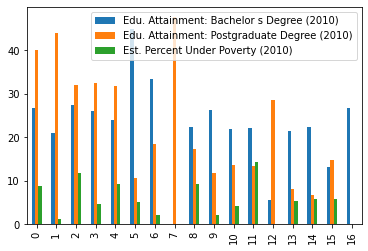

In [11]:
top_edu = top_eduIncome[['Edu. Attainment: Bachelor s Degree (2010)',	'Edu. Attainment: Postgraduate Degree (2010)','Est. Percent Under Poverty (2010)']]
top_edu.astype(float).plot.bar()

### Education-Income Conclusion ###
After sorting by highest education, highest income, and lowest poverty, Squirrel Hill North and Regent Square came out as top two choices.